In [1]:
import scipy.io
import os
import re
import glob
import importlib

import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec


import utils as util
import plotting as putil
import importlib

In [2]:
%matplotlib notebook

In [3]:
putil.set_sns_style(style='dark', min_fontsize=12)

In [5]:
rootdir = '/mnt/minerva'
# rootdir = '/Volumes/Julie'
assay='20mm_dyad'

videodir = os.path.join(rootdir, 'courtship-videos', assay)
# rootdir = '/mnt/sda/Videos'
sessionpaths = sorted(glob.glob(os.path.join(videodir, '20*')), key=util.natsort)
print(len(sessionpaths))

# Add FT processed data from AO
if assay == '38mm_dyad':
    addpaths = sorted(glob.glob(os.path.join(videodir, 'AO_data', '*')), key=util.natsort)
    sessionpaths.extend(addpaths)
print(len(sessionpaths))

# Set output dirs
ftdir = os.path.join( rootdir, 'free-behavior-analysis/FlyTracker')
savedir = os.path.join(ftdir, assay)

figdir = os.path.join(savedir, 'ethograms')
if not os.path.exists(figdir):
    os.makedirs(figdir)
print(figdir)

66
66
/mnt/minerva/free-behavior-analysis/FlyTracker/20mm_dyad/ethograms


In [6]:
# fname = '20220130-1125_ctns_4do_sh'
found_species_abbr = [os.path.split(fname)[-1].split('_')[1] if assay=='20mm_dyad' else \
                      os.path.split(fname)[-1].split('_')[2] for fname in sessionpaths\
                      if re.findall(r'(\d{8})(.*?_)', os.path.split(fname)[-1]) and 'json' not in fname]
if assay == '38mm_dyad':
    found_species_abbr.extend(['mel', 'suz'])
#                          if re.search(r'(\d+-\d+)', os.path.split(fname)[-1])]
list(set(found_species_abbr))

['yak',
 'ctns',
 'tei',
 'mauR4',
 'sant',
 'Canton-S',
 'ere',
 'mauR',
 'rsim',
 'mauW',
 'san']

In [7]:
#sess = [i for i in sessionpaths if '20220212-1150_ctns_3do_sh' in i][0]
no_trk=[]; found_trk=[]; found_parent_dirs=[];
for sess in sessionpaths:
    found_mats = glob.glob(os.path.join(sess, '**',  '*feat.mat'))
    if len(found_mats)==0:
        no_trk.append(os.path.split(sess)[-1])
    else:
        found_trk.append(os.path.split(sess)[-1])
        found_parent_dirs.append(sess)
        #print(os.path.split(sess)[-1], len(found_mats))

In [8]:
no_trk

['20220126',
 '20220127',
 '20220127-1058_san_3do_gh',
 '20220127-1430_san_3do_gh',
 '20220127-1505_san_3do_gh',
 '20220127-1628_mauR4_3do_gh',
 '20220128-1445_yak_2do_sh',
 '20220130-1051_ere_3do_gh',
 '20220202-1009_mauW_7do_sh',
 '20220202-1044_mauW_7do_sh',
 '20220202-1122_mauW_7do_sh',
 '20220202-1531_mauR_7do_sh',
 '20220202-1607_mauR_7do_sh',
 '20220203-1020_mauR_7do_sh',
 '20220212-1117_mauR4_3do_sh',
 '20220212-1150_ctns_3do_sh',
 '20220212_preprocessing.json.done',
 '20220303-0939_san_3do_sh',
 '20220303-1024_tei_6do_sh',
 '20220308-0944_san_5do_gh',
 '20220308-1022_san_5do_gh',
 '20220308-1055_san_5do_gh',
 '20220308-1126_san_5do_gh',
 '20220308-1139_san_5do_gh',
 '20220308_preprocessing.json.done',
 '20220309-0938_san_5do_gh',
 '20220309-1013_san_6do_gh',
 '20220309-1026_san_5do_gh',
 '20220309-1101_san_5do_gh',
 '20220309-1136_san_5do_gh',
 '20220309-1154_san_5do_gh',
 '20220309_preprocessing.json.done']

In [9]:
# mat_fpath = '/mnt/sda/Videos/single_20mm_1x1/20220525_Canton-S_age4_m_sh_f_gh_1/20220525_Canton-S_age4_m_sh_f_gh_1/052522_Canton-S_age4_m_sh_f_gh_1-feat.mat'
# mat = scipy.io.loadmat(mat_fpath)
# struct_name = [k for k in mat.keys() if not k.startswith('__')]
# assert len(struct_name)==1, "Did not find unique struct name: %s" % str(struct_name)
# mdata = mat.get(struct_name[0])

# mdtype = mdata.dtype
# ndata = {n: mdata[n][0][0] for n in mdtype.names}

# columns = [n[0].replace(' ', '_') for n in ndata['names'][0]]
# n_flies, n_frames, n_flags = ndata['data'].shape

In [10]:
feat, trk = util.aggr_feat_mats(found_parent_dirs)

# f_list = []; t_list=[];
# for i, acq_dir in enumerate(found_parent_dirs):
#     acq = os.path.split(acq_dir)[-1]
#     calib_, trk_, feat_ = util.load_flytracker_data(acq_dir) #os.path.join(videodir, acq))
#     if 'cop_ind' not in calib_.keys():
#         print(acq, 'No cop')
#     else:
#         print(acq, calib_['cop_ind'])
#     # get species
#     if 'mel-' in acq:
#         species_abbr = 'mel'
#         species_strain = 'na'
#     elif 'suz-' in acq:
#         species_abbr = 'suz'
#         species_strain = 'na'
#     else:
#         if '_fly' in acq:
#             species_abbr = acq.split('_')[2]
#         else:
#             species_abbr = acq.split('_')[1]
#         species_strain = 'na'
#         if species_abbr.startswith('mau'):
#             species_strain = species_abbr[3:]
#             species_abbr = species_abbr[0:3]
#         elif species_abbr in ('Canton-S', 'ctns'):
#             species_abbr = 'mel'
#             species_strain = 'cantons'
#     # get age
#     if '_fly' in acq:
#         age = int(re.sub('\D', '', acq.split('_')[3]))
#     elif len(acq.split('_'))<2:
#         age = None
#     else:
#         age = int(re.sub('\D', '', acq.split('_')[2]))

#     # get sex
#     cop_ix = calib_['cop_ind'] if calib_['cop_ind']!=0 else feat_.index[-1]
#     #ix_male = trk_.groupby('id').mean()['body_area'].idxmax() #.unique()
#     #ix_female = trk_.groupby('id')['body_area'].mean().idxmax()
#     if acq in ['20231222-1149_fly2_eleWT_4do_sh_eleWT_4do_gh', '20231223-1212_fly3_eleWT_5do_sh_eleWT_5do_gh']:
#         ix_male = 1
#     elif float(trk_[trk_['frame']<=cop_ix].groupby('id')['body_area'].mean().round(1).diff().abs().dropna()) == 0: 
#         #float(feat_[feat_['frame']<=cop_ix].groupby('id')['max_wing_ang'].mean().round(1).diff().abs().dropna()) == 0: # difference is super tiny
#         #ix_male = trk_[trk_['frame']<=cop_ix].groupby('id')['body_area'].mean().idxmin() # use body size
#         ix_male = feat_[feat_['frame']<=cop_ix].groupby('id')['max_wing_ang'].mean().idxmax()
#     else:
#         #ix_male = feat_[feat_['frame']<=cop_ix].groupby('id')['max_wing_ang'].mean().idxmax()
#         ix_male = trk_[trk_['frame']<=cop_ix].groupby('id')['body_area'].mean().idxmin() # use body size
        
# #     if trk_.groupby('id')['minor_axis_len'].mean().round().diff().max() <= 1:
# #         ix_female = trk_.groupby('id')['body_area'].mean().idxmax()
# #     else:
# #         ix_female = trk_.groupby('id')['minor_axis_len'].mean().idxmax() # this seems most reliable
#     #assert len(ix_max)==1, "Ambiguous sex based on size: {}".format(trk_.groupby('id').mean()[['major_axis_len', 'body_area', 'minor_axis_len']].idxmax())
#     #ix_male = feat_.groupby('id')['max_wing_ang'].mean().idxmax()
#     feat_.loc[feat_['id']==ix_male, 'sex'] = 'm'
#     feat_.loc[feat_['id']!=ix_male, 'sex'] = 'f'
    
#     print('--', species_abbr, age, feat_['sex'].unique(), 'male ID: {}'.format(feat_[feat_['sex']=='m']['id'].unique()[0]))
#     try:
#         #male_wg = feat_[(feat_['frame']<=cop_ix) & (feat_['sex']=='m')]['max_wing_ang'].median()
#         #female_wg = feat_[(feat_['frame']<=cop_ix) & (feat_['sex']=='f')]['max_wing_ang'].median()
#         male_wg = feat_[(feat_['frame']<cop_ix) & (feat_['max_wing_ang']>1.5) & (feat_['sex']=='m')].count()[0]
#         female_wg = feat_[(feat_['frame']<cop_ix) & (feat_['max_wing_ang']>1.5) & (feat_['sex']=='f')].count()[0]
#         assert male_wg-female_wg > 100, "Male wing is not >> than female. Check: %s" % acq
#     except AssertionError as e: # AssertionError as e:
#         print(e)   
#     # update
#     feat_['species'] = species_abbr
#     feat_['strain'] = species_strain
#     feat_['age'] = age
#     feat_['acquisition'] = acq
#     feat_['copulation_index'] = calib_['cop_ind']
#     feat_['copulation'] = calib_['cop_ind']>0
#     grab_index = calib_['cop_ind']-1 if calib_['cop_ind']>0 else feat_.iloc[-1].name
#     f_list.append(feat_[feat_['frame']<=grab_index])
#     # add trk, too
#     trk_['acquisition'] = acq
#     t_list.append(trk_[trk_['frame']<=grab_index])
# feat = pd.concat(f_list) #.reset_index(drop=True)
# trk = pd.concat(t_list)
# feat.head()

20220530_Canton-S_age5_m_sh_f_gh_1 19511
-- mel 5 ['m' 'f'] male ID: 0
Male wing is not >> than female. Check: 20220530_Canton-S_age5_m_sh_f_gh_1
20220530_Canton-S_age4_m_sh_f_gh_4 11320
-- mel 4 ['m' 'f'] male ID: 0
Male wing is not >> than female. Check: 20220530_Canton-S_age4_m_sh_f_gh_4
20220525_Canton-S_age5_m_sh_f_age4_gh_5 16305
-- mel 5 ['m' 'f'] male ID: 0
Male wing is not >> than female. Check: 20220525_Canton-S_age5_m_sh_f_age4_gh_5
20220525_Canton-S_age5_m_sh_f_age4_gh_4 31475
-- mel 5 ['m' 'f'] male ID: 0
Male wing is not >> than female. Check: 20220525_Canton-S_age5_m_sh_f_age4_gh_4
20220525_Canton-S_age5_m_sh_f_age4_gh_2 51355
-- mel 5 ['m' 'f'] male ID: 0
Male wing is not >> than female. Check: 20220525_Canton-S_age5_m_sh_f_age4_gh_2
20220525_Canton-S_age4_m_sh_f_gh_1 41677
-- mel 4 ['f' 'm'] male ID: 1
Male wing is not >> than female. Check: 20220525_Canton-S_age4_m_sh_f_gh_1
20220307_Canton-S_age5m_sh_f_gh_5 49265
-- mel 5 ['m' 'f'] male ID: 0
Male wing is not >> than

In [15]:
trk = feat[1]
feat=feat[0]
print(trk.shape, feat.shape)

(2930354, 41) (2930354, 24)


In [16]:
feat['species'].unique()

array(['mel', 'rsim', 'yak', 'sant', 'mau'], dtype=object)

In [17]:
print(savedir)

/mnt/minerva/free-behavior-analysis/FlyTracker/20mm_dyad


In [18]:
# output_dir = '/mnt/minerva/free-behavior-analysis/FlyTracker'
feat_fpath = os.path.join(savedir, 'feat.pkl')
feat.to_pickle(feat_fpath)

In [19]:
# feat_fpath = os.path.join(basedir, 'feat.pkl')
# with open(feat_fpath, 'wb') as f:
#     pkl.dump(feat, f)

In [20]:
trk_fpath = os.path.join(savedir, 'trk.pkl')
trk.to_pickle(trk_fpath)

In [21]:
# test = pd.read_pickle(trk_fpath)
# test.head()

In [22]:
# with open(feat_fpath, 'rb') as f:
#     fdict = pkl.load(f)

In [23]:
%matplotlib notebook

In [249]:
# fig, ax = pl.subplots()
# sns.histplot(data=feat[feat['copulation']==1], x='dist_to_other', hue='species', ax=ax, 
#              cumulative=True, common_norm=False, stat='probability', element='step')

# matlab structs

In [24]:
ftdir = os.path.join( rootdir, 'free-behavior-analysis/FlyTracker')
#basedir = '/mnt/minerva/analysis/FlyTracker'
# matlab_src = '/home/julianarhee/Documents/projects/flytracker-analysis/overviews2/Ddata.mat'
matlab_src = os.path.join(ftdir, 'flytracker-matlab/overviews-%s/Ddata.mat' % assay)
# Set save dir
destdir = os.path.join(ftdir, assay, 'ethograms')
if not os.path.exists(destdir):
    os.makedirs(destdir)
# set FIGID
figid = 'flytracker-matlab/overviews-%s/Ddata.mat' % assay
print(destdir)

/mnt/minerva/free-behavior-analysis/FlyTracker/20mm_dyad/ethograms


In [25]:
destdir

'/mnt/minerva/free-behavior-analysis/FlyTracker/20mm_dyad/ethograms'

In [26]:
mat = scipy.io.loadmat(matlab_src, simplify_cells=True)
species_list = [k for k in mat.keys() if not k.startswith('__')]
# assert len(species_list)==1, "Did not find unique struct name: %s" % str(struct_name)
print("Found species in struct: {}".format(species_list))

Found species in struct: ['elegans', 'mauritiana', 'melanogaster', 'simulans', 'santomea', 'yakuba']


In [27]:
species_colors = sns.color_palette('colorblind', n_colors=len(species_list))

#### Aggregate BINARY events and BOUTS 

In [28]:
behavior_names = ['All Wing Extensions', 'Putative Tap Events', 'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting']
nonorienting_names = [b for b in behavior_names if b!='Orienting']
print(nonorienting_names)

['All Wing Extensions', 'Putative Tap Events', 'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts']


In [29]:
events = util.load_binary_evs_from_mat(matlab_src, feat=feat, behavior_names=behavior_names)
#events = util.add_bout_durations(events)
# binevs_list=[]
# for sp in species_list:
#     if not isinstance(mat[sp], list):
#         mat[sp] = [mat[sp]]
#     for acq_ix, acq_mat in enumerate(mat[sp]):
#         if len(acq_mat)==0:
#             continue
#         acq = acq_mat['acquisition']
# #         print(sp, acq)
#         bin_ = util.mat_combine_binary_behaviors(acq_mat) #mat[sp][acq_ix])
#         # Get bout starts
#         bin_ = util.mat_split_courtship_bouts(bin_)
#         # wing bouts?
#         bin_['Unilateral Wing Extensions'] = [1 if (l==1 or r==1) and (l!=r) else 0 for (l, r) \
#                                   in bin_[['Left Wing Extensions', 'Right Wing Extensions']].values]
#         ori_only = bin_[(bin_[nonorienting_names].eq(0).all(1)) & (bin_['Orienting'])]
#         bin_['Orienting Only'] = 0
#         bin_['Orienting Only'].loc[ori_only.index] = 1

#         #bouts_ = util.mat_get_bout_indices(acq_mat) #mat[sp][acq_ix])
#         # get features mat
#         feat_ = feat[(feat['acquisition']==acq) & (feat['sex']=='m')].copy()
#         bin_ = bin_.loc[0:feat_.index[-1]] # Only grab til copulation index
#         assert bin_.shape[0]==feat_.shape[0], "Incorrect shapes for merging: binary evs {} and feat {}".format(bin_.shape, feat_.shape)
#         evs_ = pd.merge(bin_, feat_, left_index=True, right_index=True)
#         # bouts
#         #bouts_['acquisition'] = acq_mat['acquisition']
#         #bouts_['species'] = sp
#         #bouts_['strain'] = feat_['strain'].unique()[0]
#         binevs_list.append(evs_)
# events = pd.concat(binevs_list).reset_index()
# # add bout durations
# for aq, df_ in events.groupby('acquisition'):
#     dur_dict = util.get_bout_durs(df_)
#     events.loc[df_.index, 'boutdur'] = [dur_dict[v] for v in df_['boutnum']]

mauritiana 20220128-1516_mauR4_4do_gh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


mauritiana 20220128-1555_mauR4_4do_gh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


mauritiana 20220130-1143_mauR_4do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


mauritiana 20220202-0930_mauW_7do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


mauritiana 20220203-0955_mauR_7do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220130-1125_ctns_4do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220301_Canton-S_age5_m_sh_f_gh_1


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220301_Canton-S_age5_m_sh_f_gh_3


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220301_Canton-S_age5_m_sh_f_gh_4


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220301_Canton-S_age5_m_sh_f_gh_6


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220303_Canton-S_age4_m_sh_f_gh_7


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220307_Canton-S_age5_2


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220307_Canton-S_age5_3


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220307_Canton-S_age5_m_sh_f_gh_4_6


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220307_Canton-S_age5m_sh_f_gh_5


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220525_Canton-S_age4_m_sh_f_gh_1


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220525_Canton-S_age5_m_sh_f_age4_gh_2


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220525_Canton-S_age5_m_sh_f_age4_gh_4


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220525_Canton-S_age5_m_sh_f_age4_gh_5


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220530_Canton-S_age4_m_sh_f_gh_4


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


melanogaster 20220530_Canton-S_age5_m_sh_f_gh_1


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


simulans 20220202-1146_rsim_7do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


simulans 20220212-1041_rsim_3do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


santomea 20220202-1415_sant_7do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


santomea 20220203-0912_sant_3do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


santomea 20220203-0951_sant_3do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


santomea 20220203-1025_sant_3do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


yakuba 20220202-0918_yak_3do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


yakuba 20220202-1013_yak_3do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


yakuba 20220202-1051_yak_3do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


yakuba 20220202-1453_yak_6do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


yakuba 20220203-1147_yak_7do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


yakuba 20220207-0942_yak_3do_sh


/home/julianarhee/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Plot 

In [30]:
behavior_names = ['All Wing Extensions', 'Putative Tap Events', 'Chasing', 
                  'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting']
nonorienting_names = [b for b in behavior_names if b!='Orienting']
print(nonorienting_names)

for b in behavior_names:
    print(b, events[events['Disengaged']==1][b].unique())


['All Wing Extensions', 'Putative Tap Events', 'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts']
All Wing Extensions [0.]
Putative Tap Events [0.]
Chasing [0.]
Licking/Proboscis Ext [0.]
Copulation Attempts [0.]
Orienting [0.]


In [31]:
nonorienting_names

['All Wing Extensions',
 'Putative Tap Events',
 'Chasing',
 'Licking/Proboscis Ext',
 'Copulation Attempts']

## Split data into bouts, get bout metrics

In [32]:
import scipy.stats as spstats
def groupby_circmeans(d_, circ_vars=['min_wing_ang', 'max_wing_ang',  'angle_between', 'facing_angle']):
    return pd.concat([pd.DataFrame({varname: spstats.circmean(d_[varname], np.pi, 0)}, index=[0]) for varname in circ_vars], axis=1)

In [33]:
# Get SUM/MEAN of each binary event per bout
groups = ['species', 'acquisition', 'Disengaged', 'copulation']
bouts = events.groupby(groups, group_keys=True)\
                 .apply(util.get_bout_durs, return_as_df=True).reset_index()
grab_cols =  ['All Wing Extensions', 'Putative Tap Events', 
              'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting',
             'Orienting Only', 'Unilateral Wing Extensions', 'Bilateral Wing Extensions']

grab_cols.extend(['species', 'acquisition', 'boutnum'])
counts = events.groupby(['acquisition', 'species', 'boutnum']).mean().reset_index()[grab_cols] ## should it be counts? maybe a fraction (fraction of bout)
bouts = bouts.merge(counts, on=['acquisition', 'species', 'boutnum'])

# Merge with FEAT averages 
feat_vars = ['vel', 'ang_vel', 'mean_wing_length',
           'axis_ratio', 'fg_body_ratio', 'contrast', 'dist_to_wall',
           'dist_to_other', 'leg_dist']
circ_vars = ['min_wing_ang', 'max_wing_ang',  'angle_between', 'facing_angle']
# Get average per bout for the other values
feat_vars.extend(['species', 'acquisition', 'boutnum'])
feat_means = events.groupby(['acquisition', 'species', 'boutnum']).mean().reset_index()[feat_vars]
feat_means_circ = events.groupby(['acquisition', 'species', 'boutnum']).apply(groupby_circmeans).reset_index()
feat_means = feat_means.merge(feat_means_circ, on=['acquisition', 'species', 'boutnum'])

#feat_means
bouts = bouts.merge(feat_means, on=['acquisition', 'species', 'boutnum'])
bouts.shape, feat_means.shape, feat_means_circ.shape

((6449, 30), (6449, 17), (6449, 8))

In [34]:
bouts['species'].unique()

array(['mau', 'mel', 'rsim', 'sant', 'yak'], dtype=object)

# Save matlab

In [35]:
print(savedir)

/mnt/minerva/free-behavior-analysis/FlyTracker/20mm_dyad


In [36]:
# manual
# acq = '20220130-1143_mauR_4do_sh'
events.loc[(events['acquisition']=='20220130-1143_mauR_4do_sh')
           & (events['index']>=2304) & (events['index']<=2308), 'Licking Proboscis Ext'] = 1
events.loc[(events['acquisition']=='20220130-1143_mauR_4do_sh') 
           & (events['index']>=2309) & (events['index']<=2313), 'Copulation Attempts'] = 1

# acq = '20220128-1516_mauR4_4do_gh'
# 16464, '20220128-1516_mauR4_4do_gh', uwe, but is grooming
#16464, '20220128-1516_mauR4_4do_gh', uwe, but is grooming
# 22590, def tap
# 23090+ abdomen vibrating?
events.loc[(events['acquisition']=='20220128-1516_mauR4_4do_gh') 
        & (events['index']<=22095), 'Unilateral Wing Extensions'] = 0
events.loc[(events['acquisition']=='20220128-1516_mauR4_4do_gh') 
        & (events['index']<=22095), 'All Wing Extensions'] = 0

events.loc[(events['acquisition']=='20220128-1516_mauR4_4do_gh') 
        & (events['index']>=22630) & (events['index']<=22640), 'Licking/Proboscis Ext'] = 1
events.loc[(events['acquisition']=='20220128-1516_mauR4_4do_gh') 
        & (events['index']>=22685) & (events['index']<=22704), 'Licking/Proboscis Ext'] = 1
events.loc[(events['acquisition']=='20220128-1516_mauR4_4do_gh') 
        & (events['index']>=22720) & (events['index']<=22722), 'Licking/Proboscis Ext'] = 1

events.loc[(events['acquisition']=='20220128-1516_mauR4_4do_gh') 
        & (events['index']>=22640) & (events['index']<=22656), 'Copulation Attempts'] = 1
events.loc[(events['acquisition']=='20220128-1516_mauR4_4do_gh') 
        & (events['index']>=22704) & (events['index']<=22706), 'Copulation Attempts'] = 1

events.loc[(events['acquisition']=='20220128-1516_mauR4_4do_gh') 
        & (events['index']>=22800) & (events['index']<=22905), 'Orienting'] = 1
events.loc[(events['acquisition']=='20220128-1516_mauR4_4do_gh') 
        & (events['index']>=22095) & (events['index']<=22932), 'Chasing'] = 1

In [37]:
events_fpath = os.path.join(savedir, 'events.pkl')
events.to_pickle(events_fpath)

In [38]:
bouts_fpath = os.path.join(savedir, 'bouts.pkl')
bouts.to_pickle(bouts_fpath)

In [266]:
# evs_fpath = os.path.join(basedir, 'events.pkl')
# with open(evs_fpath, 'wb') as f:
#     pkl.dump({'events': events, 'bouts': bouts}, f)

#### Set species CMAP

In [268]:
species_cmap = sns.color_palette('colorblind', n_colors=bouts['species'].nunique())

#n_colors=bouts[(bouts['copulation'])]['species'].nunique())

curr_species = bouts['species'].unique()
print(curr_species)

species_palette = dict((sp, col) for sp, col in zip(curr_species, species_cmap))

['eleWT' 'mel' 'suz' 'yakWT']


## Ethograms - 1 species

In [50]:
etho = events[events['Disengaged']>=0].copy()
etho.groupby('species')['boutnum'].nunique()

species
mau     638
mel     229
rsim    607
sant    183
yak     501
Name: boutnum, dtype: int64

In [51]:
plot_behaviors = [
    'Disengaged','Putative Tap Events', 'Orienting',  'Orienting Only', 
    'Chasing', 'Unilateral Wing Extensions', 'Bilateral Wing Extensions', 'Licking/Proboscis Ext', 'Copulation Attempts'
]
bg_color=[.75]*3
nonbinary_behavs = ['leg_dist', 'vel'] #, 'facing_angle']
behavior_colors = sns.color_palette('cubehelix', n_colors=len(plot_behaviors)+1, desat=1)[1:]
behavior_colors

[(0.09159726558869186, 0.20394337960213008, 0.29623965888210324),
 (0.09406611799930165, 0.3578871412608098, 0.2837709711722866),
 (0.23627685553553798, 0.46114369021199075, 0.19770731888985726),
 (0.4949874084949309, 0.4799034869159042, 0.21147789468974837),
 (0.7354526513473982, 0.47488619035710466, 0.40254094042448907),
 (0.8325928529853291, 0.5253446757844745, 0.6869376931865353),
 (0.7936920632275369, 0.6641337211433709, 0.9042311843062529),
 (0.7588424692372242, 0.8253990353420474, 0.9542699331220588),
 (0.8385645211683802, 0.9411869386771846, 0.9357655639413167)]

In [52]:
curr_acqs = etho[(etho['species']=='mel')]['acquisition'].unique()
print(len(curr_acqs))
acq_ix = 3
curr_acq = curr_acqs[acq_ix]
evs = etho[(etho['species']=='mel') & (etho['acquisition']==curr_acq)].copy()
#rename Index so that we can use these as the xticks
plot_evs = evs[plot_behaviors].copy()
plot_evs = plot_evs.rename(index=dict( (i, v) for i, v in zip(evs[plot_behaviors].index, evs['Time Vector (s)'].values))) #, inplace=True)
positions = plot_evs.apply(lambda x: plot_evs.index[x == 1])

16


<IPython.core.display.Javascript object>


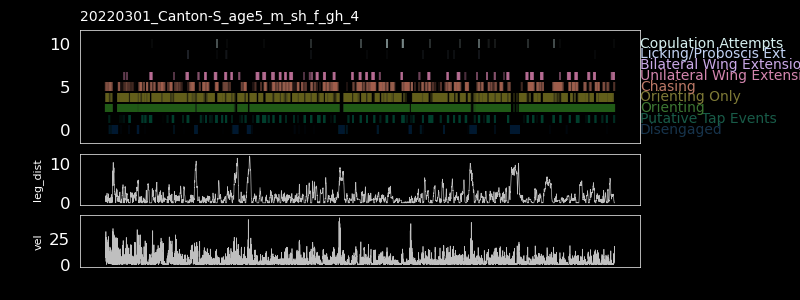

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


Text(0.1, 0.93, '20220301_Canton-S_age5_m_sh_f_gh_4')

In [53]:
fig = pl.figure(figsize=(8, len(nonbinary_behavs)*1.5)) #, constrained_layout=True)
fig.patch.set_facecolor('k') #fig.patch.set_alpha(0)
spec = gridspec.GridSpec(ncols=1, nrows=len(nonbinary_behavs)+2, figure=fig)
ax0 = fig.add_subplot(spec[0:2, 0]) # video

ax0.eventplot(positions, orientation='horizontal', colors=behavior_colors, linewidths=0.05, lineoffsets=1.25)
xlim = ax0.get_xlim()[-1]
for ai, (label, color) in enumerate(zip(plot_behaviors, behavior_colors)):
    print(ai, label)
    ax0.text(xlim, ai*1.25, label, color=color, va='center')
    
for ai, behav in enumerate(nonbinary_behavs):
    print(ai, behav)
    ax_ = fig.add_subplot(spec[ai+2, 0]) #, sharex=ax0)  # 2p
    ax_.plot(evs['Time Vector (s)'], evs[behav], color=bg_color, lw=0.5)
    ax_.set_ylabel(behav, fontsize=8)
#     if behav=='leg_dist':
#         ax_.set_ylim([0, 18])
#     elif behav=='vel':
#         ax_.set_ylim([0, 75])
#     elif 'angle' in behav:
#         ax_.set_ylim([0, 3.2])
for ai, ax in enumerate(fig.axes):
    if ai == 3:
        ax.set_xlabel('time (s)')
        ax.set_xticklabels(ax_.get_xticks()[0:])
    else: 
        ax.set_xlabel('')
        ax.set_xticklabels([])
pl.subplots_adjust(left=0.1, right=0.8, top=0.9)
fig.text(0.1, 0.93, curr_acq)

In [288]:
destdir

'/mnt/minerva/free-behavior-analysis/FlyTracker/38mm_dyad/ethograms'

<IPython.core.display.Javascript object>


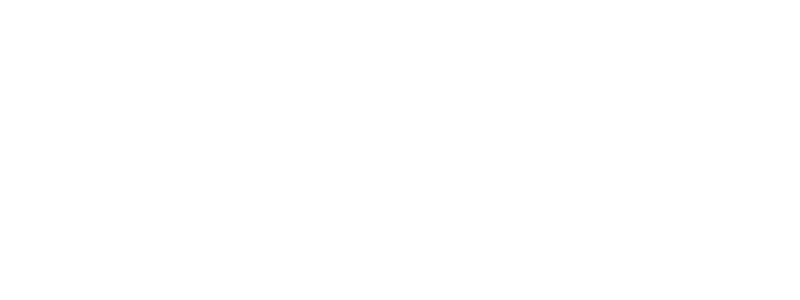

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mau_20220128-1516_mauR4_4do_gh


<IPython.core.display.Javascript object>


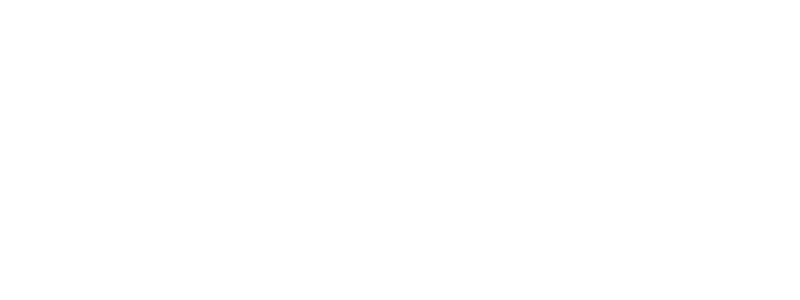

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mau_20220128-1555_mauR4_4do_gh


<IPython.core.display.Javascript object>


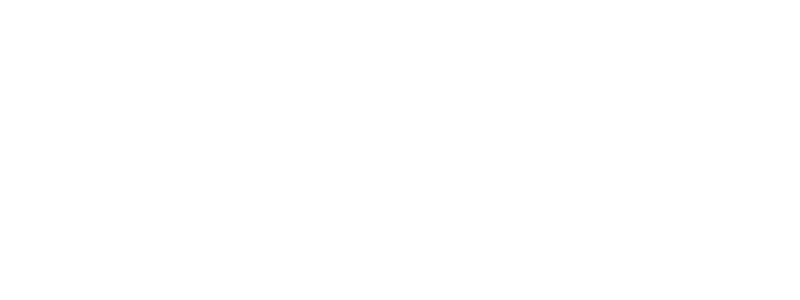

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mau_20220130-1143_mauR_4do_sh


<IPython.core.display.Javascript object>


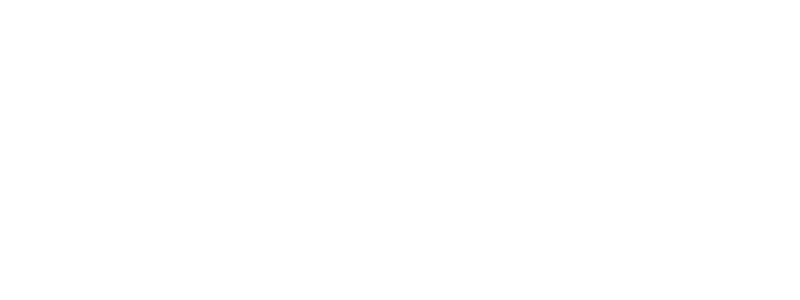

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mau_20220202-0930_mauW_7do_sh


<IPython.core.display.Javascript object>


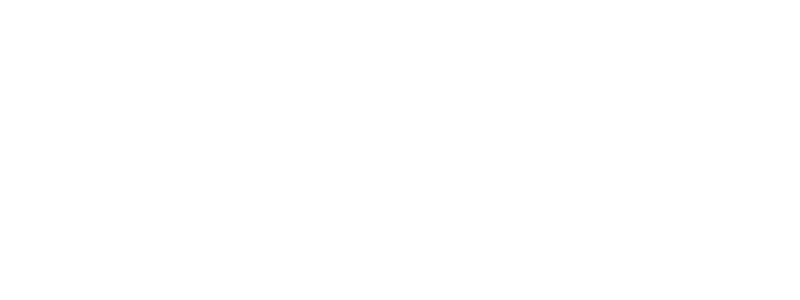

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mau_20220203-0955_mauR_7do_sh


<IPython.core.display.Javascript object>


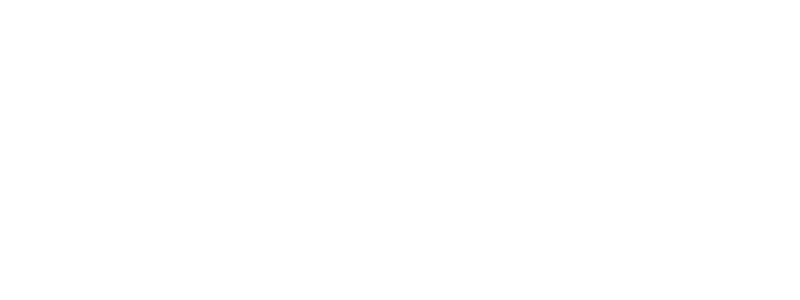

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220130-1125_ctns_4do_sh


<IPython.core.display.Javascript object>


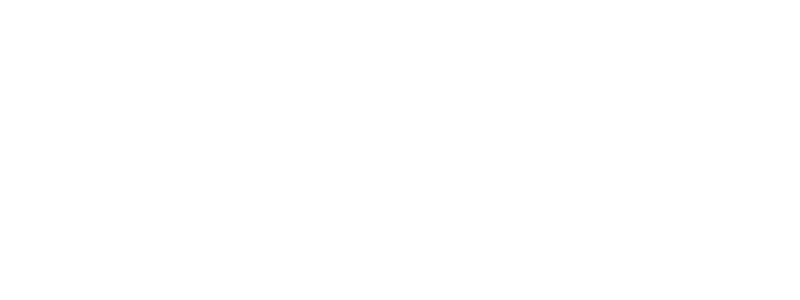

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220301_Canton-S_age5_m_sh_f_gh_1


<IPython.core.display.Javascript object>


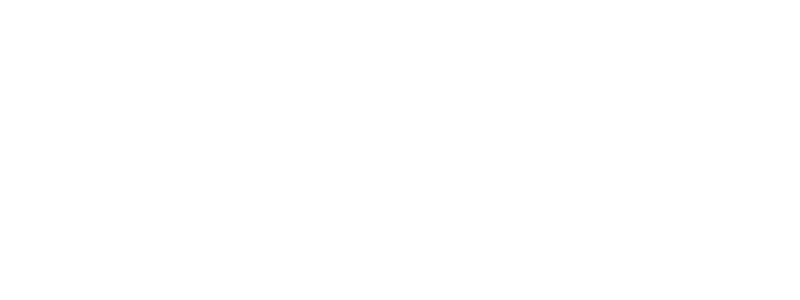

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220301_Canton-S_age5_m_sh_f_gh_3


<IPython.core.display.Javascript object>


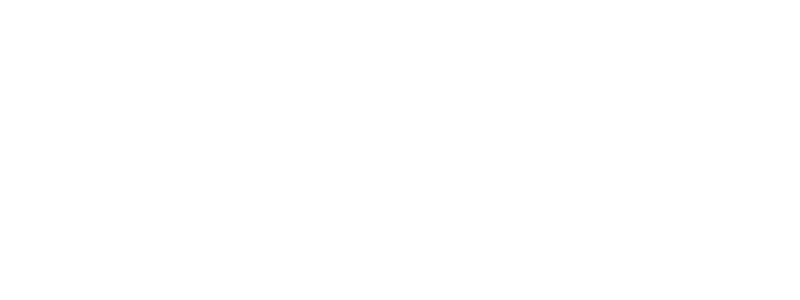

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220301_Canton-S_age5_m_sh_f_gh_4


<IPython.core.display.Javascript object>


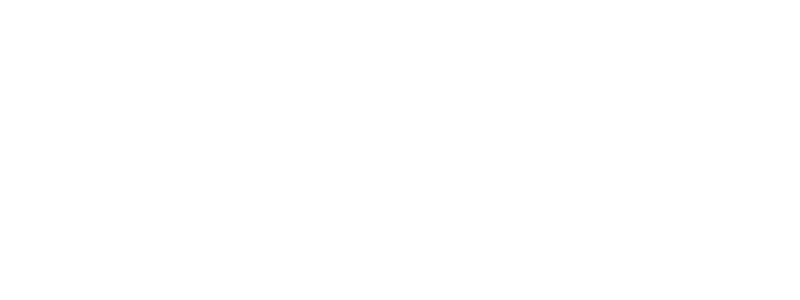

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220301_Canton-S_age5_m_sh_f_gh_6


<IPython.core.display.Javascript object>


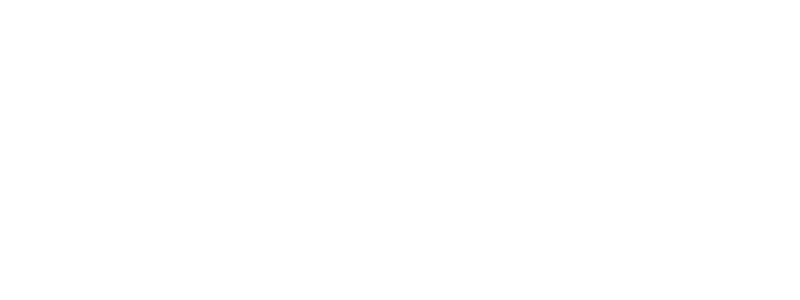

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220303_Canton-S_age4_m_sh_f_gh_7


<IPython.core.display.Javascript object>


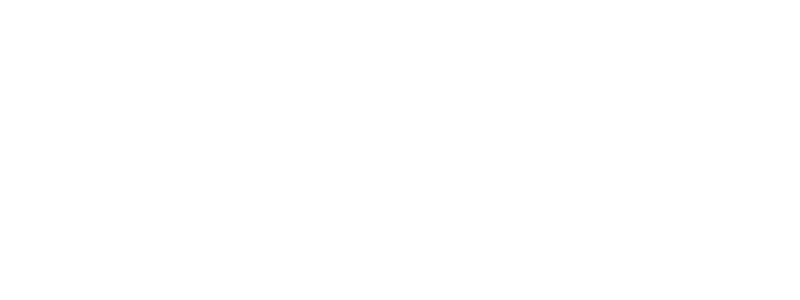

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220307_Canton-S_age5_2


<IPython.core.display.Javascript object>


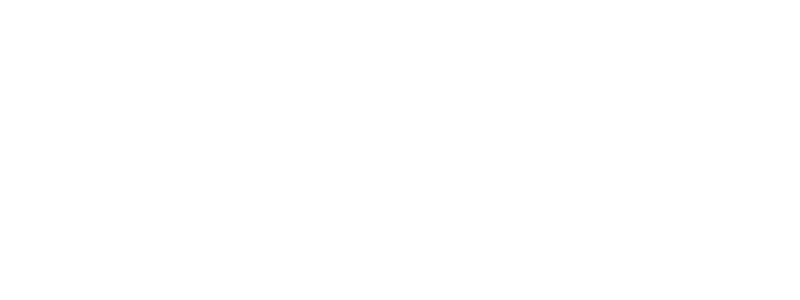

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220307_Canton-S_age5_3


<IPython.core.display.Javascript object>


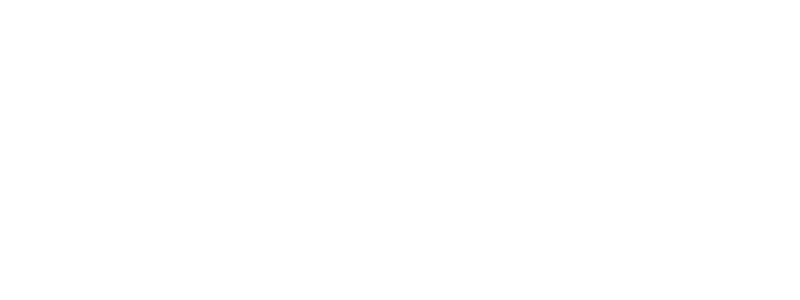

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220307_Canton-S_age5_m_sh_f_gh_4_6


<IPython.core.display.Javascript object>


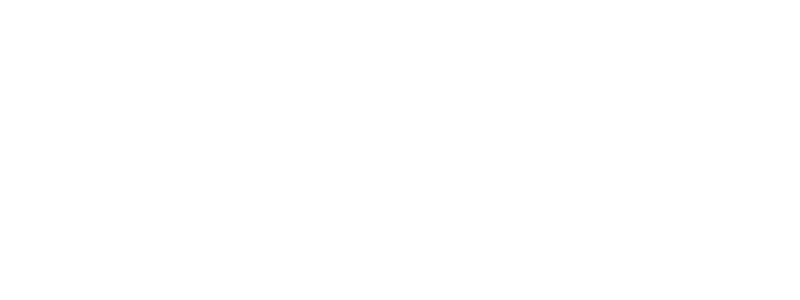

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220307_Canton-S_age5m_sh_f_gh_5


<IPython.core.display.Javascript object>


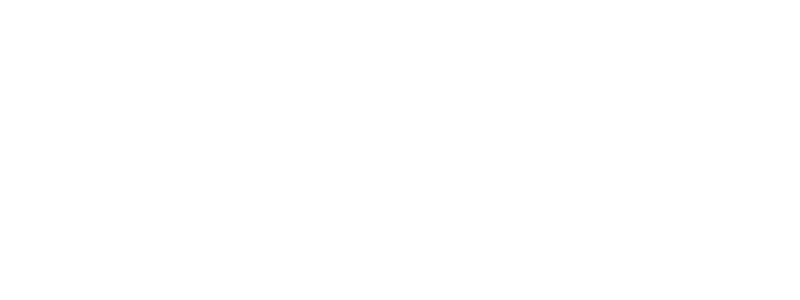

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220525_Canton-S_age4_m_sh_f_gh_1


<IPython.core.display.Javascript object>


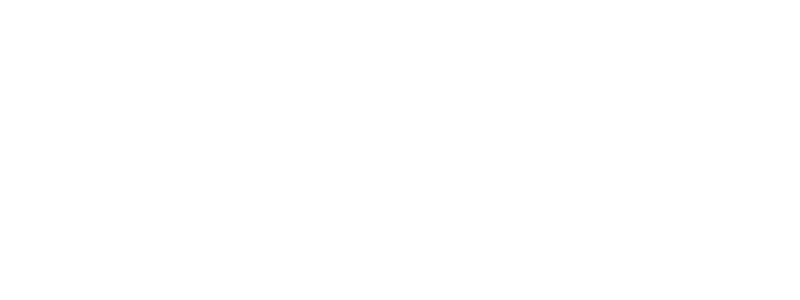

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220525_Canton-S_age5_m_sh_f_age4_gh_2


<IPython.core.display.Javascript object>


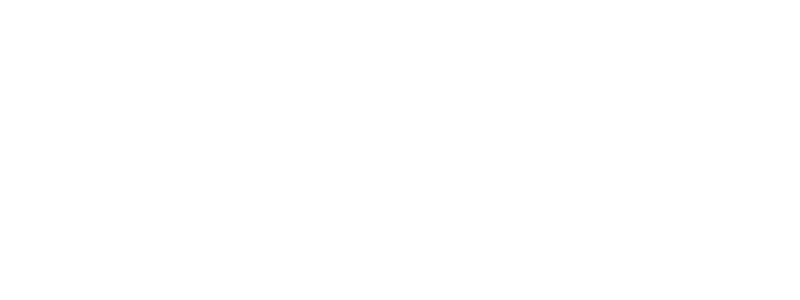

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220525_Canton-S_age5_m_sh_f_age4_gh_4


<IPython.core.display.Javascript object>


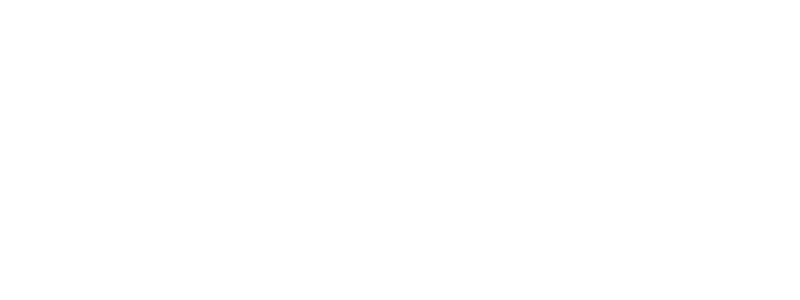

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220525_Canton-S_age5_m_sh_f_age4_gh_5


<IPython.core.display.Javascript object>


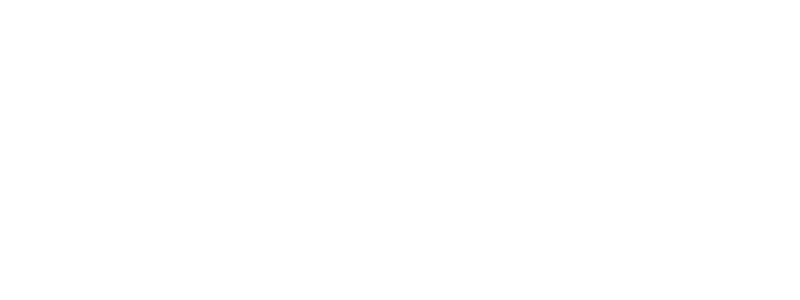

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220530_Canton-S_age4_m_sh_f_gh_4


<IPython.core.display.Javascript object>


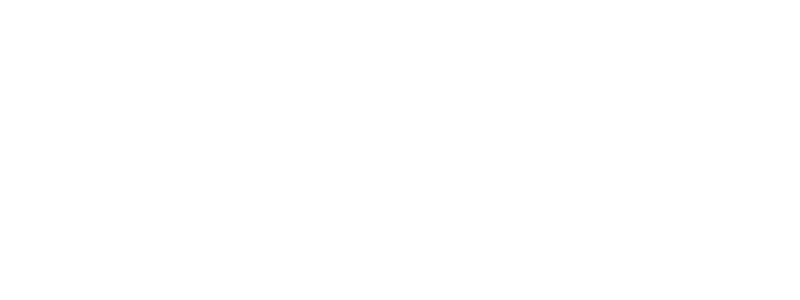

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-mel_20220530_Canton-S_age5_m_sh_f_gh_1


<IPython.core.display.Javascript object>


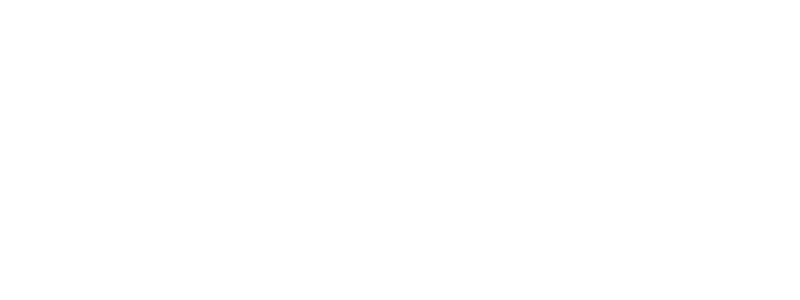

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-rsim_20220202-1146_rsim_7do_sh


<IPython.core.display.Javascript object>


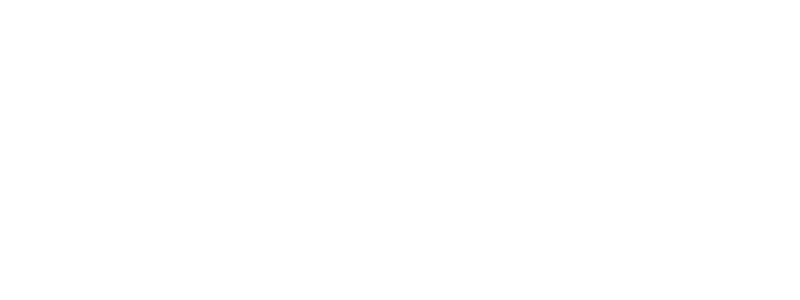

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-rsim_20220212-1041_rsim_3do_sh


<IPython.core.display.Javascript object>


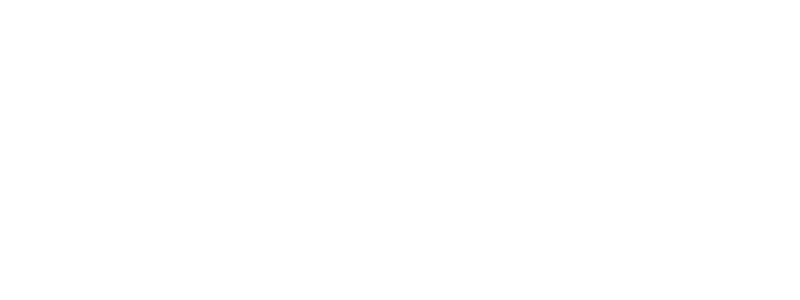

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-sant_20220202-1415_sant_7do_sh


<IPython.core.display.Javascript object>


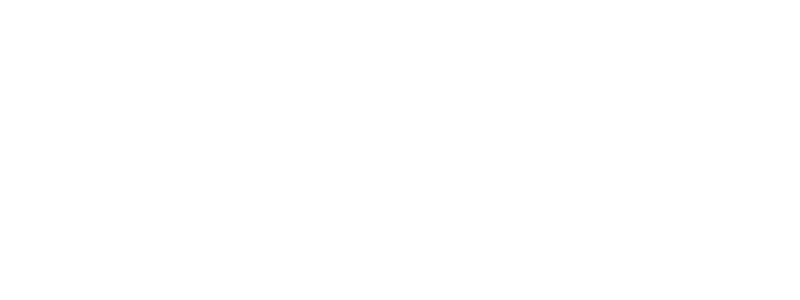

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-sant_20220203-0912_sant_3do_sh


<IPython.core.display.Javascript object>


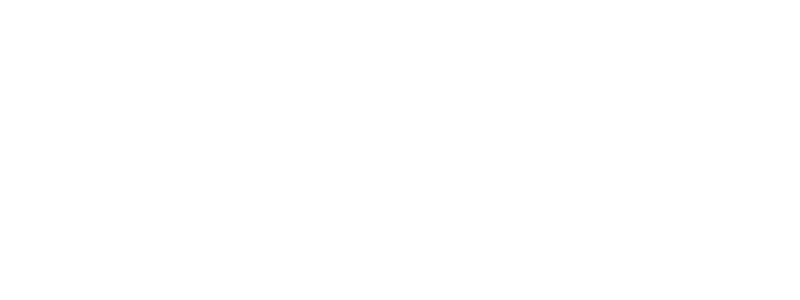

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-sant_20220203-0951_sant_3do_sh


<IPython.core.display.Javascript object>


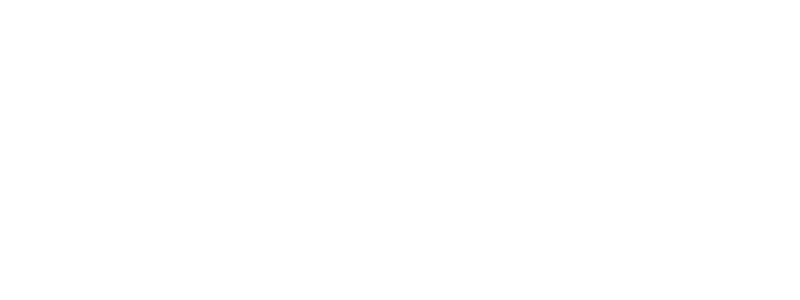

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-sant_20220203-1025_sant_3do_sh


<IPython.core.display.Javascript object>


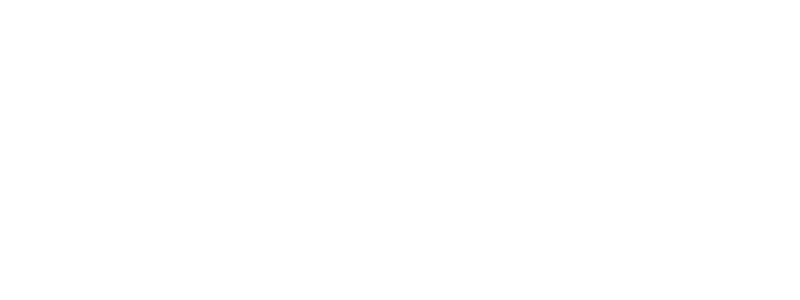

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-yak_20220202-0918_yak_3do_sh


<IPython.core.display.Javascript object>


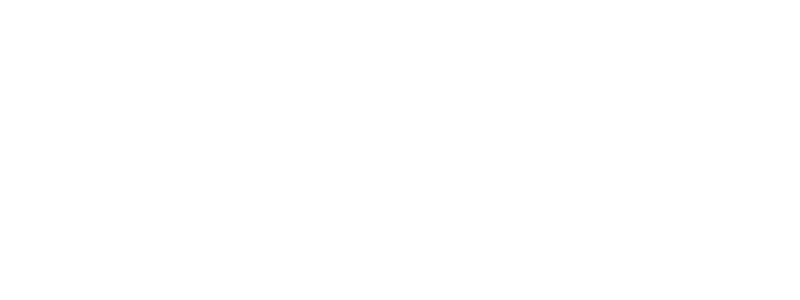

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-yak_20220202-1013_yak_3do_sh


<IPython.core.display.Javascript object>


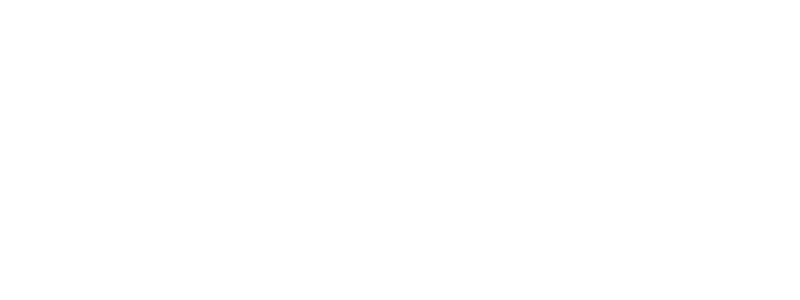

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-yak_20220202-1051_yak_3do_sh


<IPython.core.display.Javascript object>


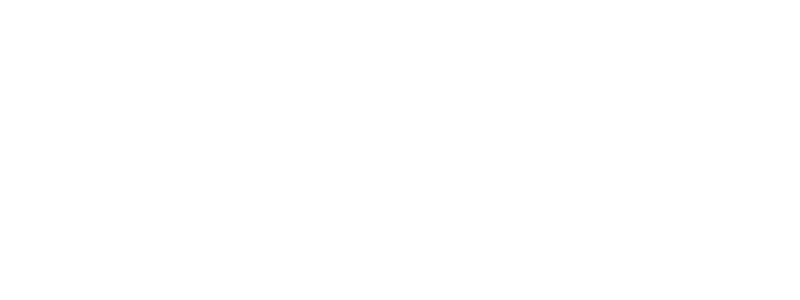

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-yak_20220202-1453_yak_6do_sh


<IPython.core.display.Javascript object>


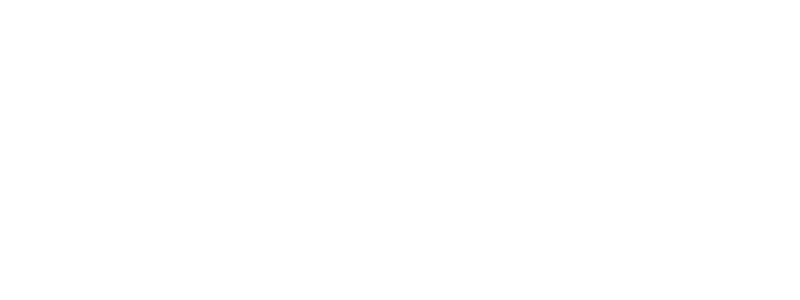

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-yak_20220203-1147_yak_7do_sh


<IPython.core.display.Javascript object>


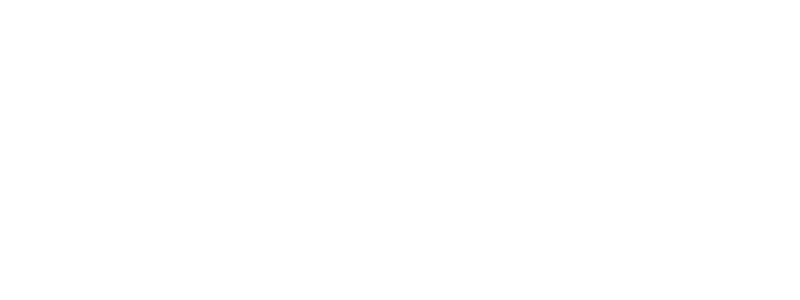

0 Disengaged
1 Putative Tap Events
2 Orienting
3 Orienting Only
4 Chasing
5 Unilateral Wing Extensions
6 Bilateral Wing Extensions
7 Licking/Proboscis Ext
8 Copulation Attempts
0 leg_dist
1 vel


<ipython-input-54-c70f3dd6d9d1>:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  pl.subplots_adjust(left=0.1, right=0.8)


ethograms-yak_20220207-0942_yak_3do_sh


In [54]:
        
for sp, df_ in etho.groupby('species'):
    for acq_ix, (curr_acq, evs) in enumerate(df_.groupby('acquisition')):
        #evs = engaged[(engaged['species']=='mau') & (engaged['acquisition']==curr_acq)].copy()
        # rename Index so that we can use these as the xticks
        plot_evs = evs[plot_behaviors].copy()
        plot_evs = plot_evs.rename(index=dict( (i, v) for i, v in zip(evs[plot_behaviors].index, evs['Time Vector (s)'].values))) #, inplace=True)
        positions = plot_evs.apply(lambda x: plot_evs.index[x == 1])
        # --------------------------------------
        fig = pl.figure(figsize=(8, len(nonbinary_behavs)*1.5), constrained_layout=True)
        fig.patch.set_facecolor('k') #fig.patch.set_alpha(0)
        spec = gridspec.GridSpec(ncols=1, nrows=len(nonbinary_behavs)+2, figure=fig)
        ax0 = fig.add_subplot(spec[0:2, 0]) # video
        ax0.eventplot(positions, orientation='horizontal', colors=behavior_colors, linewidths=0.05, lineoffsets=1.25)
        xlim = ax0.get_xlim()[-1]
        for ai, (label, color) in enumerate(zip(plot_behaviors, behavior_colors)):
            print(ai, label)
            ax0.text(xlim, ai*1.25, label, color=color, va='center')
        for ai, behav in enumerate(nonbinary_behavs):
            print(ai, behav)
            ax_ = fig.add_subplot(spec[ai+2, 0]) #, sharex=ax0)  # 2p
            ax_.plot(evs['Time Vector (s)'], evs[behav], color=bg_color, lw=0.5)
            ax_.set_ylabel(behav, fontsize=8)
#             if behav=='leg_dist':
#                 ax_.set_ylim([0, 18])
#             elif behav=='vel':
#                 ax_.set_ylim([0, 75])
#             elif 'angle' in behav:
#                 ax_.set_ylim([0, 3.2])
        for ai, ax in enumerate(fig.axes):
            if ai == 3:
                ax.set_xlabel('time (s)')
                ax.set_xticklabels(ax_.get_xticks()[0:])
            else: 
                ax.set_xlabel('')
                ax.set_xticklabels([])
        pl.subplots_adjust(left=0.1, right=0.8)
        fig.text(0.1, 0.93, curr_acq)
        # ------------------------------------------
        figname = 'ethograms-{}_{}'.format(sp, curr_acq)
        pl.savefig(os.path.join(destdir, '{}.png'.format(figname)))
        print(figname)
        pl.close()

In [119]:
destdir

'/mnt/minerva/analysis/FlyTracker/figures'

In [109]:
# fig, ax = pl.subplots()
# sns.stripplot()
boutdurs.groupby(['species'])['Copulation Attempts'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
mau,1481.0,0.005534,0.060107,0.0,0.0,0.0,0.0,1.000000
mel,1218.0,0.002330,0.021619,0.0,0.0,0.0,0.0,0.600000
rsim,563.0,0.000609,0.005403,0.0,0.0,0.0,0.0,0.072202
sant,346.0,0.010299,0.093866,0.0,0.0,0.0,0.0,1.000000
yak,968.0,0.001252,0.032429,0.0,0.0,0.0,0.0,1.000000


In [106]:
boutdurs['Copulation Attempts_log'] = np.log2(boutdurs['Copulation Attempts'])

/home/julianarhee/anaconda3/envs/flytracker/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


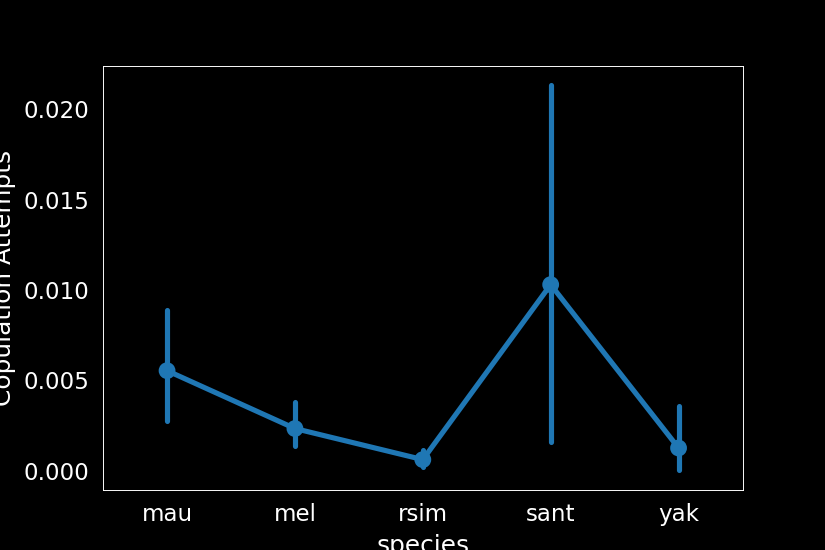

<AxesSubplot:xlabel='species', ylabel='Copulation Attempts'>

In [110]:
fig, ax = pl.subplots()
#sns.stripplot(data=boutdurs, x='species', y='Copulation Attempts')
sns.pointplot(data=boutdurs, x='species', y='Copulation Attempts')

<IPython.core.display.Javascript object>


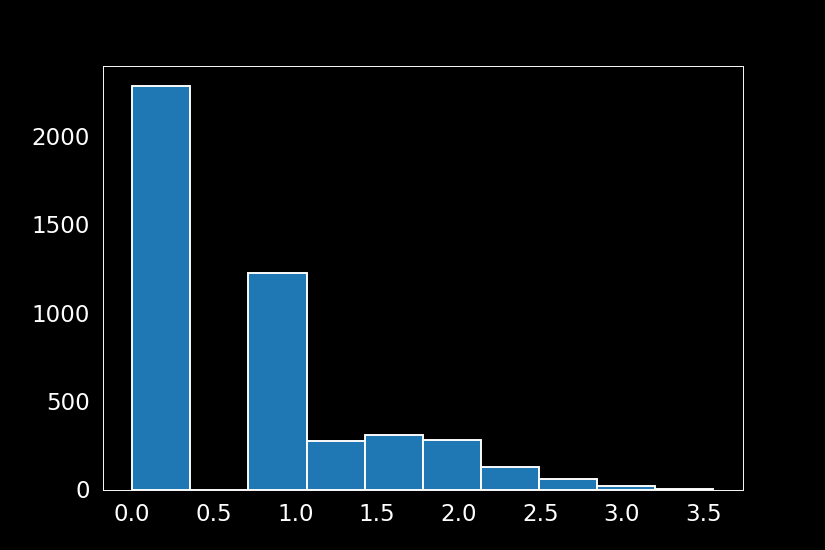

(array([2.282e+03, 0.000e+00, 1.226e+03, 2.730e+02, 3.090e+02, 2.780e+02,
        1.280e+02, 6.100e+01, 1.700e+01, 2.000e+00]),
 array([0.        , 0.35613027, 0.71226054, 1.0683908 , 1.42452107,
        1.78065134, 2.13678161, 2.49291188, 2.84904215, 3.20517241,
        3.56130268]),
 <BarContainer object of 10 artists>)

In [117]:
fig, ax= pl.subplots()
ax.hist(boutdurs[behavior_names].sum(axis=1))

In [137]:
plotdf = boutdurs[boutdurs['species'].isin(curr_species)].copy()

In [138]:
several_behavs = plotdf[plotdf[behavior_names].sum(axis=1)>=2].index

<IPython.core.display.Javascript object>


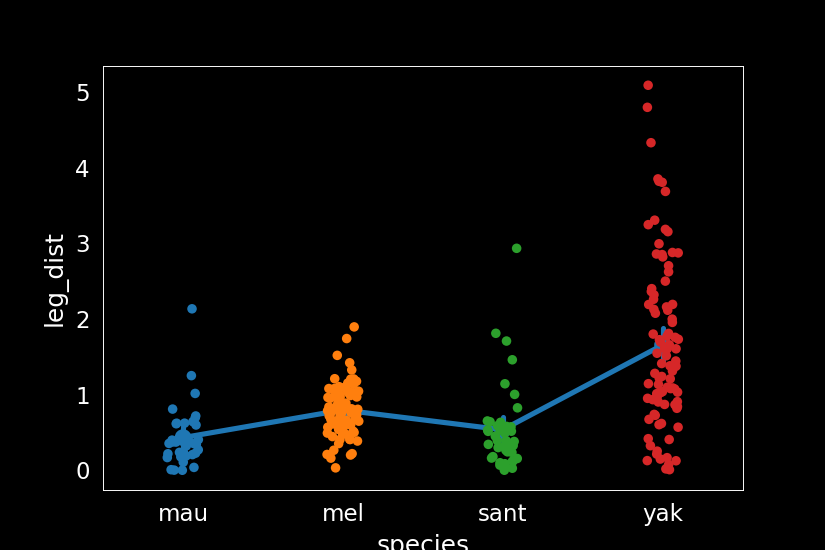

<AxesSubplot:xlabel='species', ylabel='leg_dist'>

In [139]:
fig, ax = pl.subplots()
sns.pointplot(data=plotdf.loc[several_behavs], x='species', y='leg_dist')
sns.stripplot(data=plotdf.loc[several_behavs], x='species', y='leg_dist')

In [143]:
plotdf.loc[several_behavs].groupby('species')['max_wing_ang'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
mau,1481.0,0.290436,0.235582,0.015961,0.142553,0.216028,0.346425,1.417117
mel,1218.0,0.286274,0.223761,0.012753,0.113704,0.230622,0.403187,1.450772
sant,344.0,0.389365,0.356786,0.014030,0.148807,0.209245,0.590396,2.697095
yak,968.0,0.332939,0.335380,0.018165,0.106590,0.185429,0.435111,1.664030


In [141]:
plotdf.columns

Index(['species', 'acquisition', 'Disengaged', 'copulation', 'level_4',
       'boutnum', 'boutdur', 'All Wing Extensions', 'Putative Tap Events',
       'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting',
       'vel', 'ang_vel', 'mean_wing_length', 'axis_ratio', 'fg_body_ratio',
       'contrast', 'dist_to_wall', 'dist_to_other', 'leg_dist', 'level_3',
       'min_wing_ang', 'max_wing_ang', 'angle_between', 'facing_angle',
       'Copulation Attempts_log'],
      dtype='object')

<IPython.core.display.Javascript object>


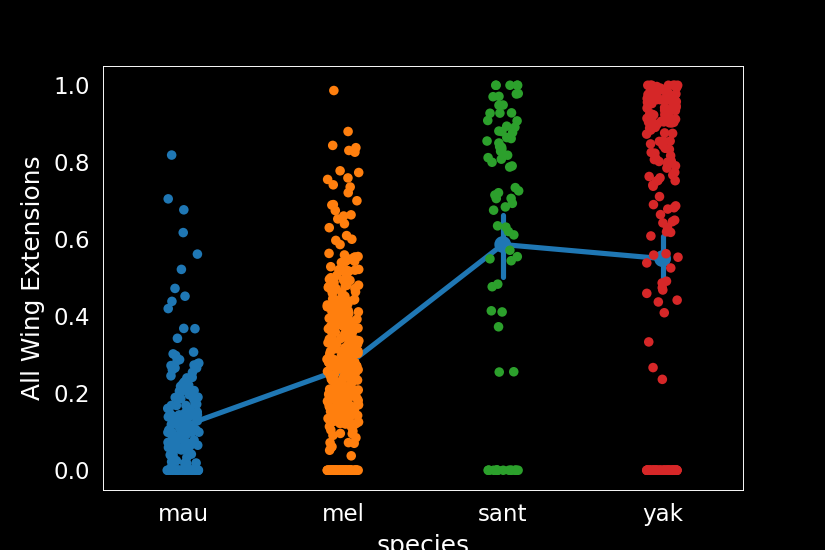

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
mau,1481.0,0.290436,0.235582,0.015961,0.142553,0.216028,0.346425,1.417117
mel,1218.0,0.286274,0.223761,0.012753,0.113704,0.230622,0.403187,1.450772
sant,344.0,0.389365,0.356786,0.014030,0.148807,0.209245,0.590396,2.697095
yak,968.0,0.332939,0.335380,0.018165,0.106590,0.185429,0.435111,1.664030


In [161]:
fig, ax = pl.subplots()
sns.pointplot(data=plotdf[plotdf['Chasing']>0], x='species', y='All Wing Extensions')
sns.stripplot(data=plotdf[plotdf['Chasing']>0], x='species', y='All Wing Extensions')

plotdf.groupby('species')['max_wing_ang'].describe()

<IPython.core.display.Javascript object>


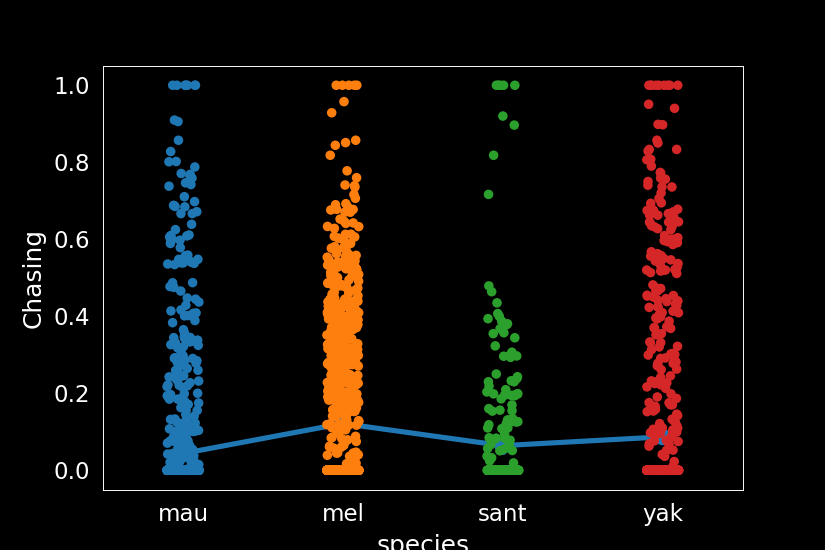

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
mau,1481.0,0.290436,0.235582,0.015961,0.142553,0.216028,0.346425,1.417117
mel,1218.0,0.286274,0.223761,0.012753,0.113704,0.230622,0.403187,1.450772
sant,344.0,0.389365,0.356786,0.014030,0.148807,0.209245,0.590396,2.697095
yak,968.0,0.332939,0.335380,0.018165,0.106590,0.185429,0.435111,1.664030


In [164]:
fig, ax = pl.subplots()
sns.pointplot(data=plotdf, x='species', y='Chasing')
sns.stripplot(data=plotdf, x='species', y='Chasing')

plotdf.groupby('species')['max_wing_ang'].describe()

In [166]:
boutdurs.groupby('species')['vel'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
mau,1481.0,3.211351,4.123149,0.010269,0.482608,1.845478,4.235976,29.439441
mel,1218.0,5.142300,4.306101,0.142845,2.329012,4.028947,6.456346,42.876559
rsim,563.0,5.731211,3.894763,0.039750,2.676517,5.250105,8.578929,21.228531
sant,346.0,4.799635,7.838039,0.012831,0.504419,1.825561,5.596272,53.170657
yak,968.0,4.333663,3.098032,0.089558,2.232899,3.802941,5.603274,40.892618


In [91]:
engaged[engaged['copulation']].groupby('species')['acquisition'].nunique()

species
mau      3
mel     15
sant     3
yak      1
Name: acquisition, dtype: int64

In [86]:
engaged[engaged['copulation']].groupby(['species'])['Copulation Attempts'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
mau,76483.0,0.011820,0.108074,0.0,0.0,0.0,0.0,1.0
mel,314930.0,0.006268,0.078923,0.0,0.0,0.0,0.0,1.0
sant,30255.0,0.006974,0.083220,0.0,0.0,0.0,0.0,1.0
yak,56340.0,0.000834,0.028871,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>


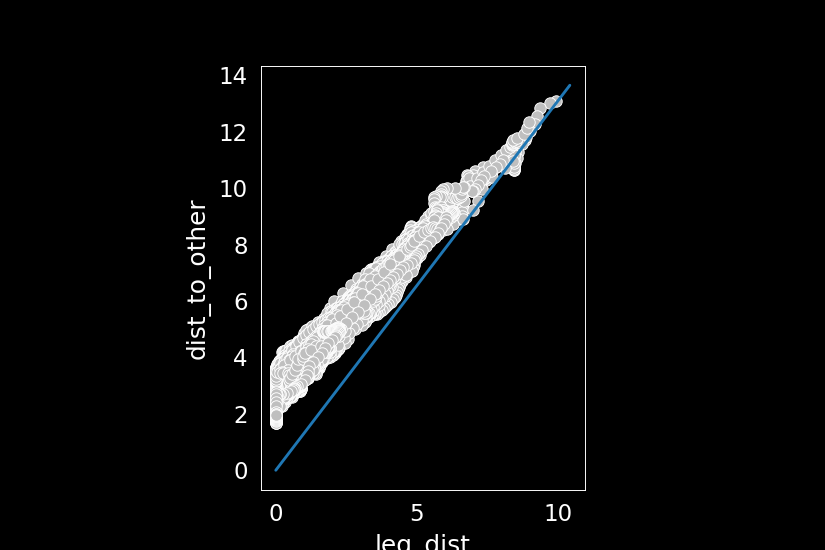

In [960]:
fig, ax = pl.subplots()
sns.scatterplot(x='leg_dist', y='dist_to_other', data=evs, color=bg_color, lw=0.5)
ax.set_aspect('equal')
ax.plot([0, ax.get_xlim()[-1]], [0, ax.get_ylim()[-1]])

## formatting

In [801]:
#rl_vids = glob.glob(os.path.join(rootdir, assay, 'MF_*'))
rl_vids = glob.glob(os.path.join(rootdir, assay, '*MF*', '20*'))


for fpath in rl_vids:
    parentdir0, fname = os.path.split(fpath)

    parentdir, subdir = os.path.split(parentdir0)

    os.rename(parentdir0, os.path.join(parentdir, fname))
    
    print(os.path.join(parentdir, fname, fname))

/mnt/sda/Videos/single_20mm_1x1/20220525_Canton-S_m_age5_sh_f_age4_gh_2/20220525_Canton-S_m_age5_sh_f_age4_gh_2
/mnt/sda/Videos/single_20mm_1x1/20220525_Canton-S_m_age5_sh_f_age4_gh_4/20220525_Canton-S_m_age5_sh_f_age4_gh_4
/mnt/sda/Videos/single_20mm_1x1/20220301_Canton-S_age5_m_sh_f_gh_4/20220301_Canton-S_age5_m_sh_f_gh_4
/mnt/sda/Videos/single_20mm_1x1/20220303_Canton-S_age4_m_sh_f_gh_7/20220303_Canton-S_age4_m_sh_f_gh_7
/mnt/sda/Videos/single_20mm_1x1/20220301_Canton-S_age5_m_sh_f_gh_1/20220301_Canton-S_age5_m_sh_f_gh_1
/mnt/sda/Videos/single_20mm_1x1/20220530_Canton-S_age5_m_sh_f_gh_1/20220530_Canton-S_age5_m_sh_f_gh_1
/mnt/sda/Videos/single_20mm_1x1/20220307_Canton-S_age5_2/20220307_Canton-S_age5_2
/mnt/sda/Videos/single_20mm_1x1/20220301_Canton-S_age5_m_sh_f_gh_6/20220301_Canton-S_age5_m_sh_f_gh_6
/mnt/sda/Videos/single_20mm_1x1/20220307_Canton-S_age_m_sh_5_f_gh_4_6/20220307_Canton-S_age_m_sh_5_f_gh_4_6
/mnt/sda/Videos/single_20mm_1x1/20220525_Canton-S_m_age5_sh_f_age4_gh_5/2022

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/sda/Videos/single_20mm_1x1/20220525_MF_5' -> '/mnt/sda/Videos/single_20mm_1x1/20220525_Canton-S_m_age5_sh_f_age4_gh_5.avi'

In [800]:
parentdir0

'/mnt/sda/Videos/single_20mm_1x1/20220525_MF_2'

In [780]:
from datetime import datetime

In [798]:
fpath = '/mnt/sda/Videos/single_20mm_1x1/20220525_MF_2/20220525_Canton-S_m_age5_sh_f_age4_gh_2'
parentdir0, fname = os.path.split(fpath)

parentdir, subdir = os.path.split(parentdir0)

print(os.path.join(parentdir, fname, fname))


# dt = fname.split('_')[0]
# dtobj = datetime.strptime(dt,'%m%d%y')
# new_fmt = dtobj.strftime('%Y%m%d')
# str_pts = [new_fmt]
# str_pts.extend(fname.split('_')[1:])
# print('_'.join(str_pts))


/mnt/sda/Videos/single_20mm_1x1/20220525_Canton-S_m_age5_sh_f_age4_gh_2/20220525_Canton-S_m_age5_sh_f_age4_gh_2
